In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.4
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_0.4_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_0.4_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.4471

Best Fitness:	601.5919
Solution:	600.0000
Diff:		1.5919

[0:04:57][----------] 1.96% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.8056

Best Fitness:	601.1273
Solution:	600.0000
Diff:		1.1273

[0:09:30][----------] 3.92% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.4482

Best Fitness:	600.8509
Solution:	600.0000
Diff:		0.8509

[0:14:32][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	607.3029

Best Fitness:	604.9536
Solution:	600.0000
Diff:		4.9536

[0:19:17][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.2022

Best Fitness:	601.4426
Solution:	600.0000
Diff:		1.4426

[0:23:58][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	603.0041

Best Fitness:	601.7851
Solution:	600.0000
Diff:		1.7851

[0:28:23][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.6137

Best Fitness:	601.0535
Solution:	600.0000
Diff:		1.0535

[0:32:47][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.3277

Best Fitness:	601.4198
Solution:	600.0000
Diff:		1.4198

[0:37:20][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.3595

Best Fitness:	600.8774
Solution:	600.0000
Diff:		0.8774

[0:41:34][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	603.2277

Best Fitness:	602.0880
Solution:	600.0000
Diff:		2.0880

[0:45:25][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.5589

Best Fitness:	601.0354
Solution:	600.0000
Diff:		1.0354

[0:49:11][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	607.2826

Best Fitness:	605.0826
Solution:	600.0000
Diff:		5.0826

[0:53:00][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.7679

Best Fitness:	601.8089
Solution:	600.0000
Diff:		1.8089

[0:57:00][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.1186

Best Fitness:	601.3491
Solution:	600.0000
Diff:		1.3491

[1:00:45][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.3196

Best Fitness:	600.7902
Solution:	600.0000
Diff:		0.7902

[1:05:00][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.0726

Best Fitness:	601.0728
Solution:	600.0000
Diff:		1.0728

[1:09:02][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.2926

Best Fitness:	600.8974
Solution:	600.0000
Diff:		0.8974

[1:13:09][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.9615

Best Fitness:	601.1619
Solution:	600.0000
Diff:		1.1619

[1:17:04][####------] 35.29% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	603.4925

Best Fitness:	602.3205
Solution:	600.0000
Diff:		2.3205

[1:21:11][####------] 37.25% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.1443

Best Fitness:	601.2647
Solution:	600.0000
Diff:		1.2647

[1:25:10][####------] 39.22% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.9533

Best Fitness:	601.2756
Solution:	600.0000
Diff:		1.2756

[1:29:08][####------] 41.18% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	603.5186

Best Fitness:	602.6209
Solution:	600.0000
Diff:		2.6209

[1:33:11][####------] 43.14% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.8143

Best Fitness:	601.2859
Solution:	600.0000
Diff:		1.2859

[1:36:50][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.8683

Best Fitness:	601.7683
Solution:	600.0000
Diff:		1.7683

[1:40:05][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.8117

Best Fitness:	601.1999
Solution:	600.0000
Diff:		1.1999

[1:43:46][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.8526

Best Fitness:	601.3079
Solution:	600.0000
Diff:		1.3079

[1:47:15][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	603.4066

Best Fitness:	602.4061
Solution:	600.0000
Diff:		2.4061

[1:50:39][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.6142

Best Fitness:	601.7251
Solution:	600.0000
Diff:		1.7251

[1:54:02][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.8069

Best Fitness:	600.9924
Solution:	600.0000
Diff:		0.9924

[1:57:33][######----] 56.86% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	605.2445

Best Fitness:	603.2966
Solution:	600.0000
Diff:		3.2966

[2:00:55][######----] 58.82% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	603.6269

Best Fitness:	602.6123
Solution:	600.0000
Diff:		2.6123

[2:04:35][######----] 60.78% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	603.7408

Best Fitness:	602.0858
Solution:	600.0000
Diff:		2.0858

[2:08:00][######----] 62.75% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	603.1646

Best Fitness:	602.0825
Solution:	600.0000
Diff:		2.0825

[2:11:31][######----] 64.71% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.6562

Best Fitness:	601.6820
Solution:	600.0000
Diff:		1.6820

[2:14:51][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.9765

Best Fitness:	601.2007
Solution:	600.0000
Diff:		1.2007

[2:18:15][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.1923

Best Fitness:	600.7904
Solution:	600.0000
Diff:		0.7904

[2:21:32][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.5901

Best Fitness:	601.6884
Solution:	600.0000
Diff:		1.6884

[2:24:39][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.9250

Best Fitness:	601.1561
Solution:	600.0000
Diff:		1.1561

[2:27:41][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.8582

Best Fitness:	601.2236
Solution:	600.0000
Diff:		1.2236

[2:30:45][########--] 76.47% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.3181

Best Fitness:	601.4426
Solution:	600.0000
Diff:		1.4426

[2:33:42][########--] 78.43% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.5708

Best Fitness:	601.8276
Solution:	600.0000
Diff:		1.8276

[2:36:48][########--] 80.39% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.9197

Best Fitness:	601.1745
Solution:	600.0000
Diff:		1.1745

[2:39:48][########--] 82.35% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.1374

Best Fitness:	601.3451
Solution:	600.0000
Diff:		1.3451

[2:42:52][########--] 84.31% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.6124

Best Fitness:	601.1115
Solution:	600.0000
Diff:		1.1115

[2:45:59][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	603.0548

Best Fitness:	601.9390
Solution:	600.0000
Diff:		1.9390

[2:49:01][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.9913

Best Fitness:	601.2426
Solution:	600.0000
Diff:		1.2426

[2:52:05][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	603.7322

Best Fitness:	602.4824
Solution:	600.0000
Diff:		2.4824

[2:55:01][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	601.8696

Best Fitness:	601.0985
Solution:	600.0000
Diff:		1.0985

[2:58:06][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	604.0371

Best Fitness:	602.7618
Solution:	600.0000
Diff:		2.7618

[3:01:00][##########] 96.08% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.2490

Best Fitness:	601.4510
Solution:	600.0000
Diff:		1.4510

[3:03:57][##########] 98.04% 

Optimization ended due to max fitness evals (max = 40000.0, curr = 39900)


#Generations:	131

#FitnessEvals:	39900

Mean Fitness:	602.0837

Best Fitness:	601.2597
Solution:	600.0000
Diff:		1.2597

[3:06:58][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:06:58

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
126,2.198828,2.263858,2.188945,2.2272,2.286381,2.253969,1.6091,2.541164,2.409223,2.287992,...,2.314966,2.110686,2.158607,2.047359,2.450078,2.246198,2.721256,2.105766,2.347932,50
127,2.198828,2.263858,2.188945,2.2272,2.286381,2.253969,1.6091,2.385510,2.409223,2.287992,...,2.314966,2.110686,2.158607,2.047359,2.284036,2.246198,2.721256,2.074507,2.347932,50
128,2.198828,2.263858,2.188945,2.2272,2.286381,2.253969,1.6091,2.385510,2.409223,2.287992,...,2.284980,2.110686,2.158607,2.047359,2.122999,2.246198,2.493718,2.074507,2.347932,50
129,2.198828,2.020789,2.188945,2.2272,2.286381,2.199037,1.6091,2.385510,2.409223,2.287992,...,2.284980,2.110686,2.158607,2.047359,2.122999,2.246198,2.246386,2.074507,2.347932,50
130,2.198828,2.020789,2.141686,2.2272,2.286381,2.189369,1.6091,2.385510,2.181674,2.287992,...,2.284980,1.930466,2.158607,2.047359,2.122999,2.246198,2.246386,2.074507,2.248140,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 1.5918632679811253

Best error for run 1: 1.1272583372281133

Best error for run 2: 0.8508865375276855

Best error for run 3: 4.95355823658565

Best error for run 4: 1.4426404543163471

Best error for run 5: 1.785130809422185

Best error for run 6: 1.0534980272509529

Best error for run 7: 1.4197697387334074

Best error for run 8: 0.8774442526496387

Best error for run 9: 2.0880494441972814

Best error for run 10: 1.0353601472354512

Best error for run 11: 5.082593864026535

Best error for run 12: 1.8089016754410068

Best error for run 13: 1.349065863013152

Best error for run 14: 0.7902380517286929

Best error for run 15: 1.0727532502778558

Best error for run 16: 0.8973981257387322

Best error for run 17: 1.161864000190917

Best error for run 18: 2.3204705090727202

Best error for run 19: 1.2646557303667123

Best error for run 20: 1.2755506111863042

Best error for run 21: 2.6208799654837094

Best error for run 22: 1.2858548496808453

Best error for run 23: 1.768341087953786

Best error for run 24: 1.1999139170097806

Best error for run 25: 1.3078597459796129

Best error for run 26: 2.406103515789937

Best error for run 27: 1.7251329701646227

Best error for run 28: 0.9924043983706952

Best error for run 29: 3.2965991341775407

Best error for run 30: 2.612316714325857

Best error for run 31: 2.0857698027207334

Best error for run 32: 2.0825138135415955

Best error for run 33: 1.682036205534132

Best error for run 34: 1.2007144098030267

Best error for run 35: 0.7903932201902535

Best error for run 36: 1.6884123180057031

Best error for run 37: 1.1560681108893505

Best error for run 38: 1.2235766315093315

Best error for run 39: 1.4426135685035888

Best error for run 40: 1.827629585323507

Best error for run 41: 1.1745055699445857

Best error for run 42: 1.3450620434338134

Best error for run 43: 1.1115461654320598

Best error for run 44: 1.9390078090975749

Best error for run 45: 1.2425791584389572

Best error for run 46: 2.482445476046337

Best error for run 47: 1.0984853714650171

Best error for run 48: 2.7617619906808386

Best error for run 49: 1.4509865410614111

Best error for run 50: 1.2597220222922942

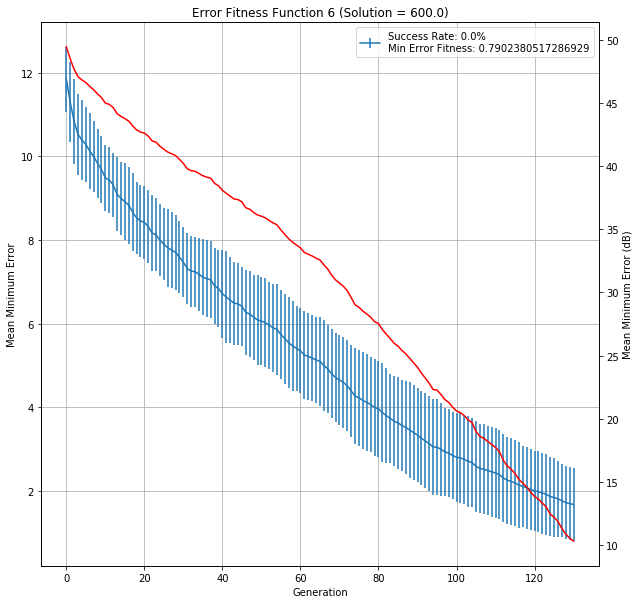

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_0.4_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,0.4,1.591863,1.127258,0.850887,4.953558,1.44264,1.785131,...,1.939008,1.242579,2.482445,1.098485,2.761762,1.450987,1.259722,1.67667,3:06:58,39900
